# AO index v.s. other variables

In [1]:
import sys
sys.path.insert(0, '../../_libs/')
import NEMO_tools as Nts

In [2]:
import glob
import datetime
import scipy.io
import scipy.signal
import numpy as np
import netCDF4 as nc
#import cartopy.feature
#import cartopy.crs as ccrs # ccrs
#import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

In [199]:
coordinate_name=glob.glob('/ocean/yingkai/GEOTRACES/NEMO-CODE/NEMOGCM/CONFIG/ANHA4_OFF/EXP00/mesh_zgr.nc')
coordinate_obj=nc.Dataset(coordinate_name[0])
nav_lon=coordinate_obj.variables['nav_lon'][:]
nav_lat=coordinate_obj.variables['nav_lat'][:]

# Variables

## AO index

In [501]:
MAT = scipy.io.loadmat('../../_data/Exchange/AO_inds.mat')
AO = MAT['AO_index'][0, :]

In [494]:
#MAT = scipy.io.loadmat('../../_data/Exchange/vor_index.mat')
#AO = MAT['vor'][0, :]

## SLP

In [4]:
year = np.arange(2002, 2014)
#u10 = np.empty([144, 368, 801])
#v10 = np.empty([144, 368, 801])
slp = np.empty([144, 368, 801])
for i in range(12):
#    name_u = glob.glob('/ocean/yingkai/GEOTRACES/FORCING/ANHA4/GDPS/*u*'+str(year[i])+'*monmean*')
#    name_v = glob.glob('/ocean/yingkai/GEOTRACES/FORCING/ANHA4/GDPS/*v*'+str(year[i])+'*monmean*')
    name_slp = glob.glob('/ocean/yingkai/GEOTRACES/FORCING/ANHA4/GDPS/*slp*'+str(year[i])+'*monmean*')
#    u_obj = nc.Dataset(name_u[0])
#    v_obj = nc.Dataset(name_v[0])
    slp_obj = nc.Dataset(name_slp[0])
#    u10[i*12:(i+1)*12, :, :] = u_obj.variables['u_wind'][:, :, :]
#    v10[i*12:(i+1)*12, :, :] = v_obj.variables['v_wind'][:, :, :]
    slp[i*12:(i+1)*12, :, :] = slp_obj.variables['atmpres'][:, :, :]

In [6]:
x = slp_obj.variables['LON'][:]
y = slp_obj.variables['LAT'][:]
[lon, lat] = np.meshgrid(x, y)

## Zonal/Meridional Currents

In [7]:
UName = sorted(glob.glob('../../_data/MAT files/vozocrtx_by_month/vozocrtx*mat'))
VName = sorted(glob.glob('../../_data/MAT files/vomecrty_by_month/vomecrty*mat'))

In [9]:
MAT = scipy.io.loadmat('../../_data/Exchange/Ba_boundary_ANHA4.mat')
domain = MAT['domain'][:].T

In [330]:
#vozocrtx0 = np.zeros([144, 800, 544])
#vomecrty0 = np.zeros([144, 800, 544])
#vozocrtx1 = np.zeros([144, 800, 544])
#vomecrty1 = np.zeros([144, 800, 544])
#
#for i in range(144):
#    #
#    print(i)
#    UMAT = scipy.io.loadmat(UName[i])
#    vz = UMAT['vozocrtx'][:]
#    vz[vz>1e7] = np.nan
#    vz0 = np.nanmean(vz[:20, :, :], 0)
#    vozocrtx0[i, :, :] = vz0
#    vz1 = np.nanmean(vz[20:27, :, :], 0)
#    vozocrtx1[i, :, :] = vz1
#    print('zonal')
#    #
#    VMAT = scipy.io.loadmat(VName[i])
#    vm = VMAT['vomecrty'][:]
#    vm[vm>1e7] = np.nan
#    vm0 = np.nanmean(vm[:20, :, :], 0)
#    vomecrty0[i, :, :] = vm0
#    vm1 = np.nanmean(vm[20:27, :, :], 0)
#    vomecrty1[i, :, :] = vm1
#    print('meridional')

In [64]:
save_var = {'vozocrtx0':vozocrtx0, 'vomecrty0':vomecrty0,
            'vozocrtx1':vozocrtx1, 'vomecrty1':vomecrty1}
scipy.io.savemat('../../_data/Exchange/UV_current.mat', mdict=save_var)

In [65]:
MAT = scipy.io.loadmat('../../_data/Exchange/UV_current.mat')
vozocrtx0 = MAT['vozocrtx0'][:]
vozocrtx1 = MAT['vozocrtx1'][:]
vomecrty0 = MAT['vomecrty0'][:]
vomecrty1 = MAT['vomecrty1'][:]

In [508]:
u0p = np.nanmean(vozocrtx0[AO>0, :, :], 0)
v0p = np.nanmean(vomecrty0[AO>0, :, :], 0)
slpp = np.nanmean(slp[AO>0, :, :], 0)/100
# 
u0n = np.nanmean(vozocrtx0[AO<0, :, :], 0)
v0n = np.nanmean(vomecrty0[AO<0, :, :], 0)
slpn = np.nanmean(slp[AO<0, :, :], 0)/100
#
spp = np.sqrt(u0p*u0p+v0p*v0p)
u0p = u0p/spp
v0p = v0p/spp
#
spn = np.sqrt(u0n*u0n+v0n*v0n)
u0n = u0n/spn
v0n = v0n/spn

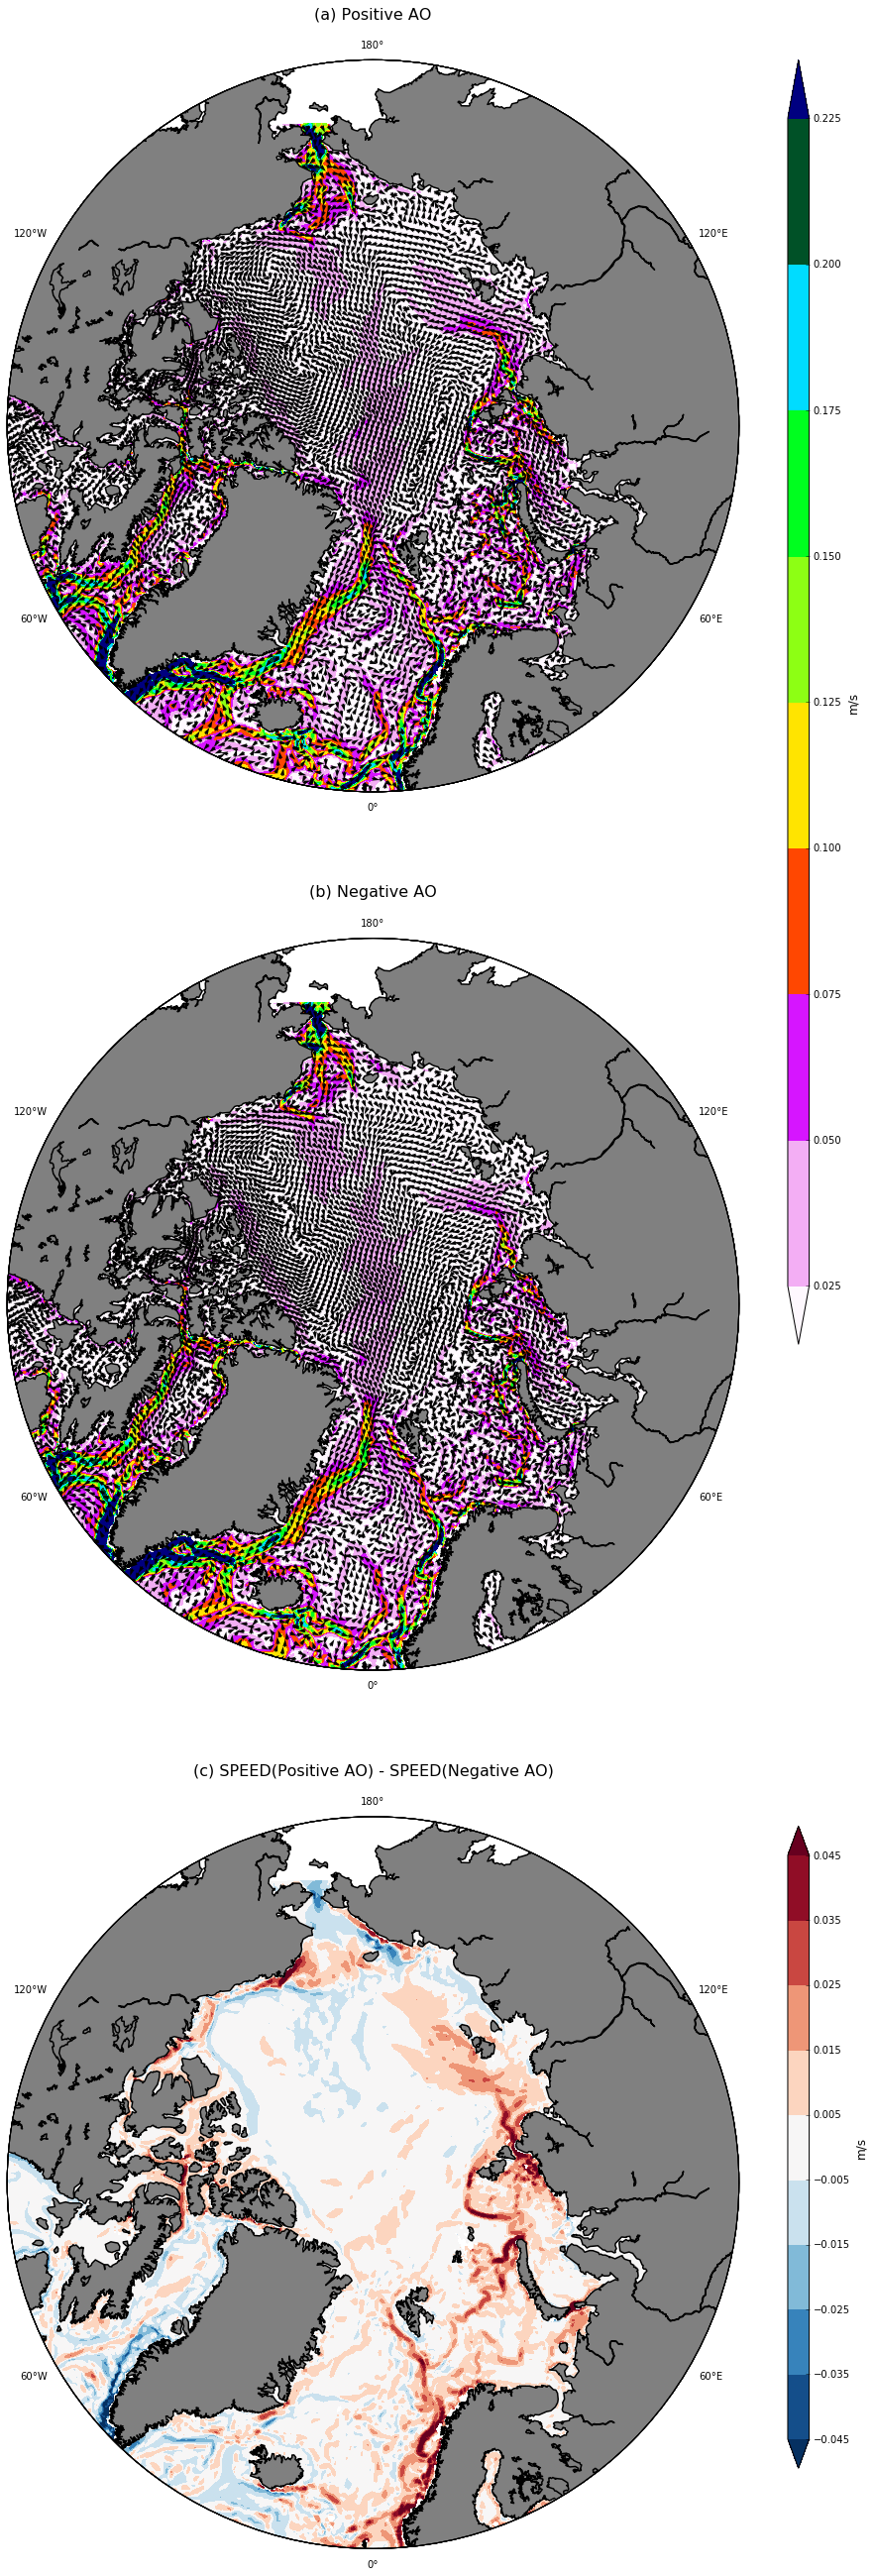

In [512]:
n=4
lev_sp = np.arange(0.025, 0.25, 0.025)
lev_sp_diff = np.array([-4.5, -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5])/100

fig=plt.figure(figsize=(15, 45));

ax1 = plt.subplot2grid((3, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((3, 1), (1, 0), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((3, 1), (2, 0), colspan=1, rowspan=1)
ax = fig.gca()

proj=Basemap(projection='npstere', resolution='l', boundinglat=60, lon_0=0, round=True, ax=ax1)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y = proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, spp, lev_sp, cmap=plt.cm.gist_ncar_r, extend='both')
proj.quiver(x[::n, ::n], y[::n, ::n], u0p[::n, ::n], v0p[::n, ::n], width=0.002, scale=95)
ax1.set_title('(a) Positive AO', y=1.05, fontsize=16)


proj=Basemap(projection='npstere', resolution='l', boundinglat=60, lon_0=0, round=True, ax=ax2)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
xslp, yslp=proj(lon, lat)
x, y = proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, spn, lev_sp, cmap=plt.cm.gist_ncar_r, extend='both')
proj.quiver(x[::n, ::n], y[::n, ::n], u0n[::n, ::n], v0n[::n, ::n], width=0.002, scale=95)
ax2.set_title('(b) Negative AO', y=1.05, fontsize=16)

cax = fig.add_axes([0.9, 0.5, 0.02, 0.4])
CBar = fig.colorbar(CS, cax=cax, orientation='vertical')
CBar.set_label('m/s', fontsize=12)
CBar.ax.tick_params(axis='x', length=16)
CBar.set_ticks(lev_sp)

proj=Basemap(projection='npstere', resolution='l', boundinglat=60, lon_0=0, round=True, ax=ax3)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
xslp, yslp=proj(lon, lat)
x, y = proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, spp-spn, lev_sp_diff, cmap=plt.cm.RdBu_r, extend='both')

cax = fig.add_axes([0.9, 0.15, 0.02, 0.2])
CBar = fig.colorbar(CS, cax=cax, orientation='vertical')
CBar.set_label('m/s', fontsize=12)
CBar.ax.tick_params(axis='x', length=16)
CBar.set_ticks(lev_sp_diff)

ax3.set_title('(c) SPEED(Positive AO) - SPEED(Negative AO)', y=1.05, fontsize=16)

## Tracer transport